##  Time Series Forecasting Project Report

## Stage 1.5

## <font size = 1> Walmart sales

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from pandas import datetime
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import timedelta
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time 
import seaborn as sns
import matplotlib.ticker as ticker
import seaborn as sb



<ipython-input-3-bd8cc1e8a0cc>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


## <font size = 2 > Exploratory analysis

## <font size = 2 >The Walmart dataset (taken from kaggle)

In [4]:
Walmart = pd.read_csv("walmart-sales-dataset-of-45stores.csv")

In [3]:
Walmart

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [4]:
Walmart.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

## <font size = 1 > The frequency of values of the column 'Store'.

In [5]:
Walmart.groupby(['Store']).size() 

Store
1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
45    143
dtype: int64

## <font size = 1 > The frequency of values of the column 'Date'.

In [6]:
Walmart.groupby(['Date']).size() 

Date
01-04-2011    45
01-06-2012    45
01-07-2011    45
01-10-2010    45
02-03-2012    45
              ..
30-07-2010    45
30-09-2011    45
30-12-2011    45
31-08-2012    45
31-12-2010    45
Length: 143, dtype: int64

## <font size = 1 > The frequency of values of the column 'Weekly_Sales'.

In [7]:
Walmart.groupby(['Weekly_Sales']).size() 

Weekly_Sales
209986.25     1
213538.32     1
215359.21     1
219804.85     1
220060.35     1
             ..
3595903.20    1
3676388.98    1
3749057.69    1
3766687.43    1
3818686.45    1
Length: 6435, dtype: int64

## <font size = 1 > The frequency of values of the column 'Holiday_Flag'.

In [8]:
Walmart.groupby(['Holiday_Flag']).size() 

Holiday_Flag
0    5985
1     450
dtype: int64

## <font size = 1 > The frequency of values of the column 'Temperature'.

In [9]:
Walmart.groupby(['Temperature']).size() 

Temperature
-2.06      1
 5.54      1
 6.23      1
 7.46      1
 9.51      1
          ..
 99.20     1
 99.22     3
 99.66     1
 100.07    1
 100.14    1
Length: 3528, dtype: int64

## <font size = 1 > The frequency of values of the column 'Fuel_Price'.

In [10]:
Walmart.groupby(['Fuel_Price']).size() 

Fuel_Price
2.472     1
2.513     1
2.514    14
2.520     1
2.533     1
         ..
4.294     6
4.301     6
4.308     3
4.449     6
4.468     6
Length: 892, dtype: int64

## <font size = 1 > The frequency of values of the column 'CPI'.

In [11]:
Walmart.groupby(['CPI']).size() 

CPI
126.064000    11
126.076645    11
126.085452    11
126.089290    11
126.101935    11
              ..
227.018417     1
227.036936     1
227.169392     1
227.214288     1
227.232807     1
Length: 2145, dtype: int64

## <font size = 1 > The frequency of values of the column 'Unemployment'.

In [12]:
Walmart.groupby(['Unemployment']).size() 

Unemployment
3.879      4
4.077     13
4.125     26
4.145      8
4.156     26
          ..
13.975    24
14.021    36
14.099    39
14.180    39
14.313    42
Length: 349, dtype: int64

## <font size = 1 > Getting information about the dataframe.

In [13]:
Walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## <font size = 1 > Dividing the Date to seperate columns: Year-Month, Year, Month. Then creating a new monthly dataframe.

In [14]:
list_YM = [i.split(" ")[0][3:] for i in  list(Walmart['Date'])] #Year-Month
list_Year = [i.split(" ")[0][6:] for i in  list(Walmart['Date'])] 
list_Month = [i.split(" ")[0][3:5] for i in  list(Walmart['Date'])]
list_Day = [i.split(" ")[0][:2] for i in  list(Walmart['Date'])]

Walmart['YM'] = list_YM
Walmart['Year'] = list_Year
Walmart['Month'] = list_Month
Walmart['Day'] = list_Day


In [15]:
Walmart.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment       YM  Year Month Day  
0  211.096358         8.106  02-2010  2010    02  05  
1  211.242170         8.106  02-2010  2010    02  12  
2  211.289143         8.106  02-2010  2010    02  19  
3  211.319643         8.106  02-2010  2010    02  26  
4  211.350143         8.106  03-2010  2010    03  05

In [16]:
#create a monthly dataframe
Walmart_monthly = Walmart.groupby(['Store', 'Weekly_Sales', 'YM', 'Year', 'Month', 'Day']).mean()
Walmart_monthly = Walmart_monthly[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].reset_index()

Walmart_monthly.head()

Store  Weekly_Sales       YM  Year Month Day  Holiday_Flag  Temperature  \
0      1    1316899.31  01-2011  2011    01  28             0        43.83   
1      1    1319325.59  01-2012  2012    01  27             0        54.26   
2      1    1327405.42  01-2011  2011    01  21             0        44.04   
3      1    1345454.00  10-2010  2010    10  22             0        69.86   
4      1    1351791.03  09-2010  2010    09  24             0        80.94   

   Fuel_Price         CPI  Unemployment  
0       3.010  212.197058         7.742  
1       3.290  220.078852         7.348  
2       3.016  211.827234         7.742  
3       2.725  211.861294         7.838  
4       2.624  211.597225         7.787

In [17]:
Top_Sales = Walmart_monthly.sort_values(by="Weekly_Sales", ascending=False)
Top_Stores = Top_Sales['Store'].head(10)
Top_Weekly_Sales = Top_Sales['Weekly_Sales'].head(10)
Top_Weekly_Sales

2001    3818686.45
2859    3766687.43
1429    3749057.69
571     3676388.98
1858    3595903.20
1857    3556766.03
2858    3555371.03
570     3526713.39
1428    3487986.89
285     3436007.68
Name: Weekly_Sales, dtype: float64

#### We shifted to monthly data to play with the dataset. For the future we used the original weekly data.

## <font size = 1 > Getting the top 10 Stores that are the highest in sales.

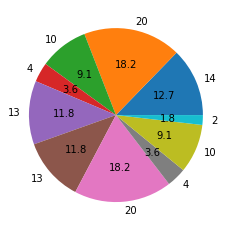

In [18]:
Top_Sales = Walmart_monthly.sort_values(by="Weekly_Sales", ascending=False)
Top_Stores = Top_Sales['Store'].head(10)
Top_Weekly_Sales = Top_Sales['Weekly_Sales'].head(10)
#plt.bar(Top_Stores, Top_Weekly_Sales, color ='maroon',width = 0.4)

plt.pie(Top_Stores, labels = Top_Stores, autopct = '%.1f')
plt.show()

## <font size = 1 > Plotting the new data. Focusing on the main variable of our research that is Weekly Sales.

ConversionError: Failed to convert value(s) to axis units: Text(0.5, 0, 'YM')

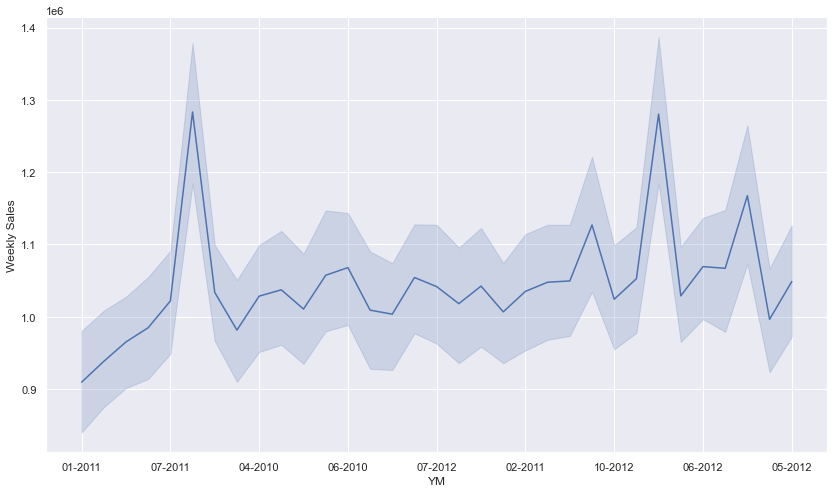

In [97]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=Walmart_monthly, x ='YM', y = 'Weekly_Sales')

#grouping each store
#ax = sns.lineplot(data=Walmart_monthly, x ='YM', y = 'Weekly_Sales',
#                   hue='Store',palette='viridis',
#                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
#plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Weekly Sales')
plt.xlabel('YM')
plt.xticks(plt.xlabel('YM'), Walmart_monthly['YM'])
plt.show()

## <font size = 1 > Extracting Trend, Seasonality and Residuals from our data and plotting them seperately for a better understanding.

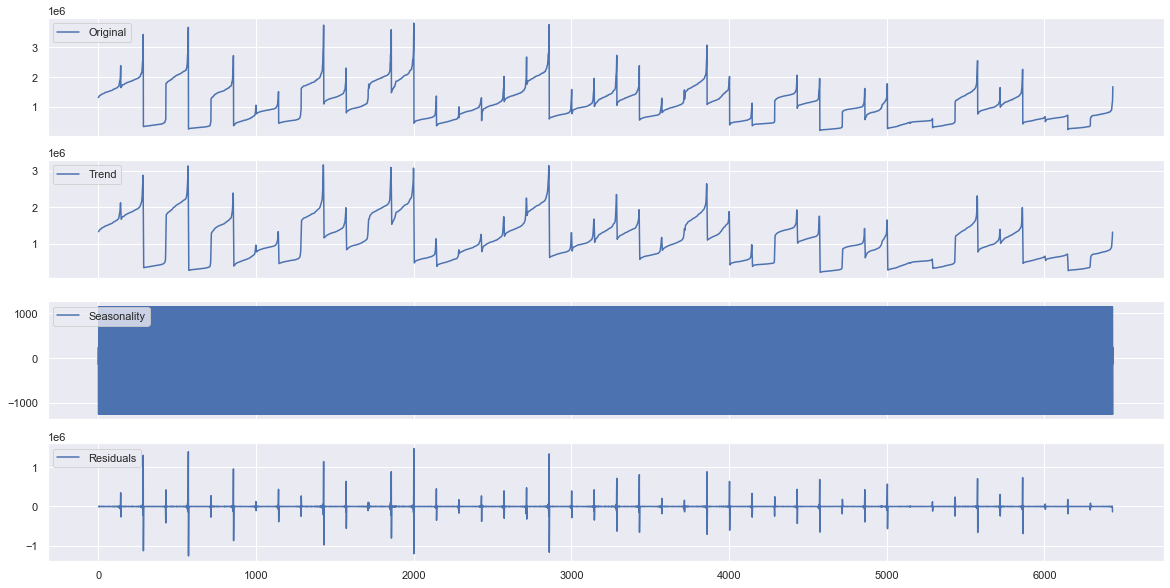

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_dicomposition = seasonal_decompose(x=Walmart_monthly[['Weekly_Sales']], model='additive', period=4)
trend_estimate = ts_dicomposition.trend
seasonal_estimate = ts_dicomposition.seasonal
residual_estimate = ts_dicomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(20)

# First plot to the Original time series
axes[0].plot(Walmart_monthly[['Weekly_Sales']], label='Original') 
axes[0].legend(loc='upper left');


# second plot to be for trend
axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');


# third plot to be Seasonality component
axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');


# last last plot to be Residual component
axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

## <font size = 1> Taking a small portion of our data to test the seasonality as it looks a little odd.

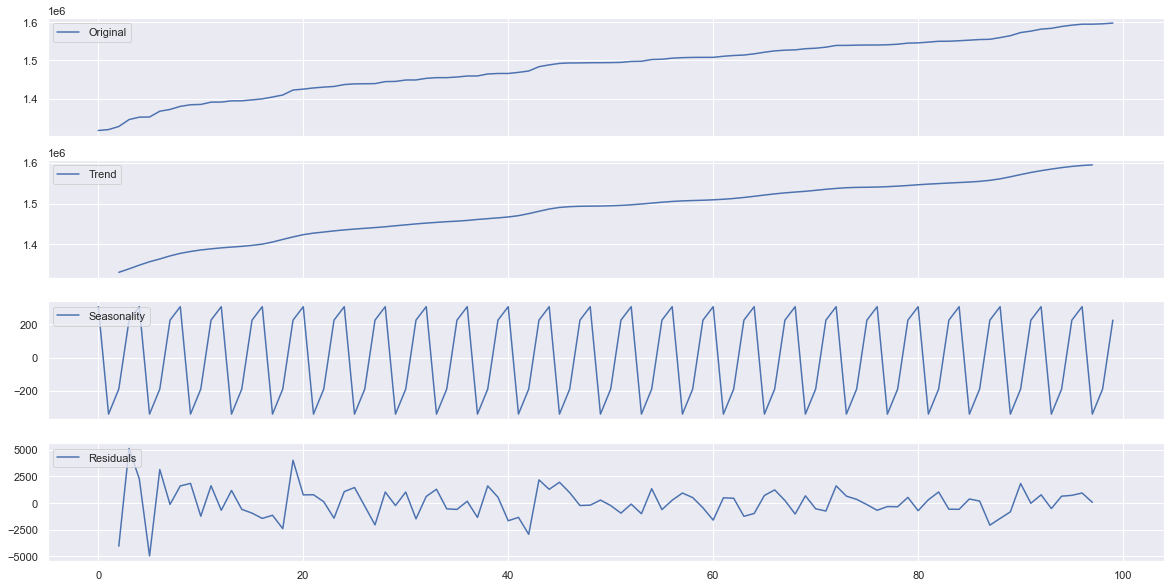

In [26]:
Walmart_tiny = Walmart_monthly[:100]

ts_dicomposition = seasonal_decompose(x=Walmart_tiny[['Weekly_Sales']], model='additive', period=4)
trend_estimate = ts_dicomposition.trend
seasonal_estimate = ts_dicomposition.seasonal
residual_estimate = ts_dicomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(20)

# First plot to the Original time series
axes[0].plot(Walmart_tiny[['Weekly_Sales']], label='Original') 
axes[0].legend(loc='upper left');


# second plot to be for trend
axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');


# third plot to be Seasonality component
axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');


# last last plot to be Residual component
axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

#### Trend and seasonality of time series are obvious from graph. When decomposing series, we conclude that additive decomposition yields random errors whereas the multiplicative decomposition does not have random errors, so the trend and the seasonality are additive.

## <font size = 1 > Interactive plot for an easier access to each store's plot.

In [27]:
list_store= list(set(Walmart['Store']))

In [28]:
import plotly.graph_objects as go

#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_store)).as_hex())

Walmart_monthly.sort_values(by = ['YM'])

fig = go.Figure()
for s,p in zip(list_store, pal):
    fig.add_trace(go.Scatter(x = Walmart_monthly[Walmart_monthly['Store']==s]['YM'],
                             y = Walmart_monthly[Walmart_monthly['Store']==s]['Weekly_Sales'],
                             name = s,
                             line_color = p, 
                             fill=None))   #tozeroy 

fig.show()

## <font size = 1 > Each store's plot of Weekly Sales by their Year-Month.

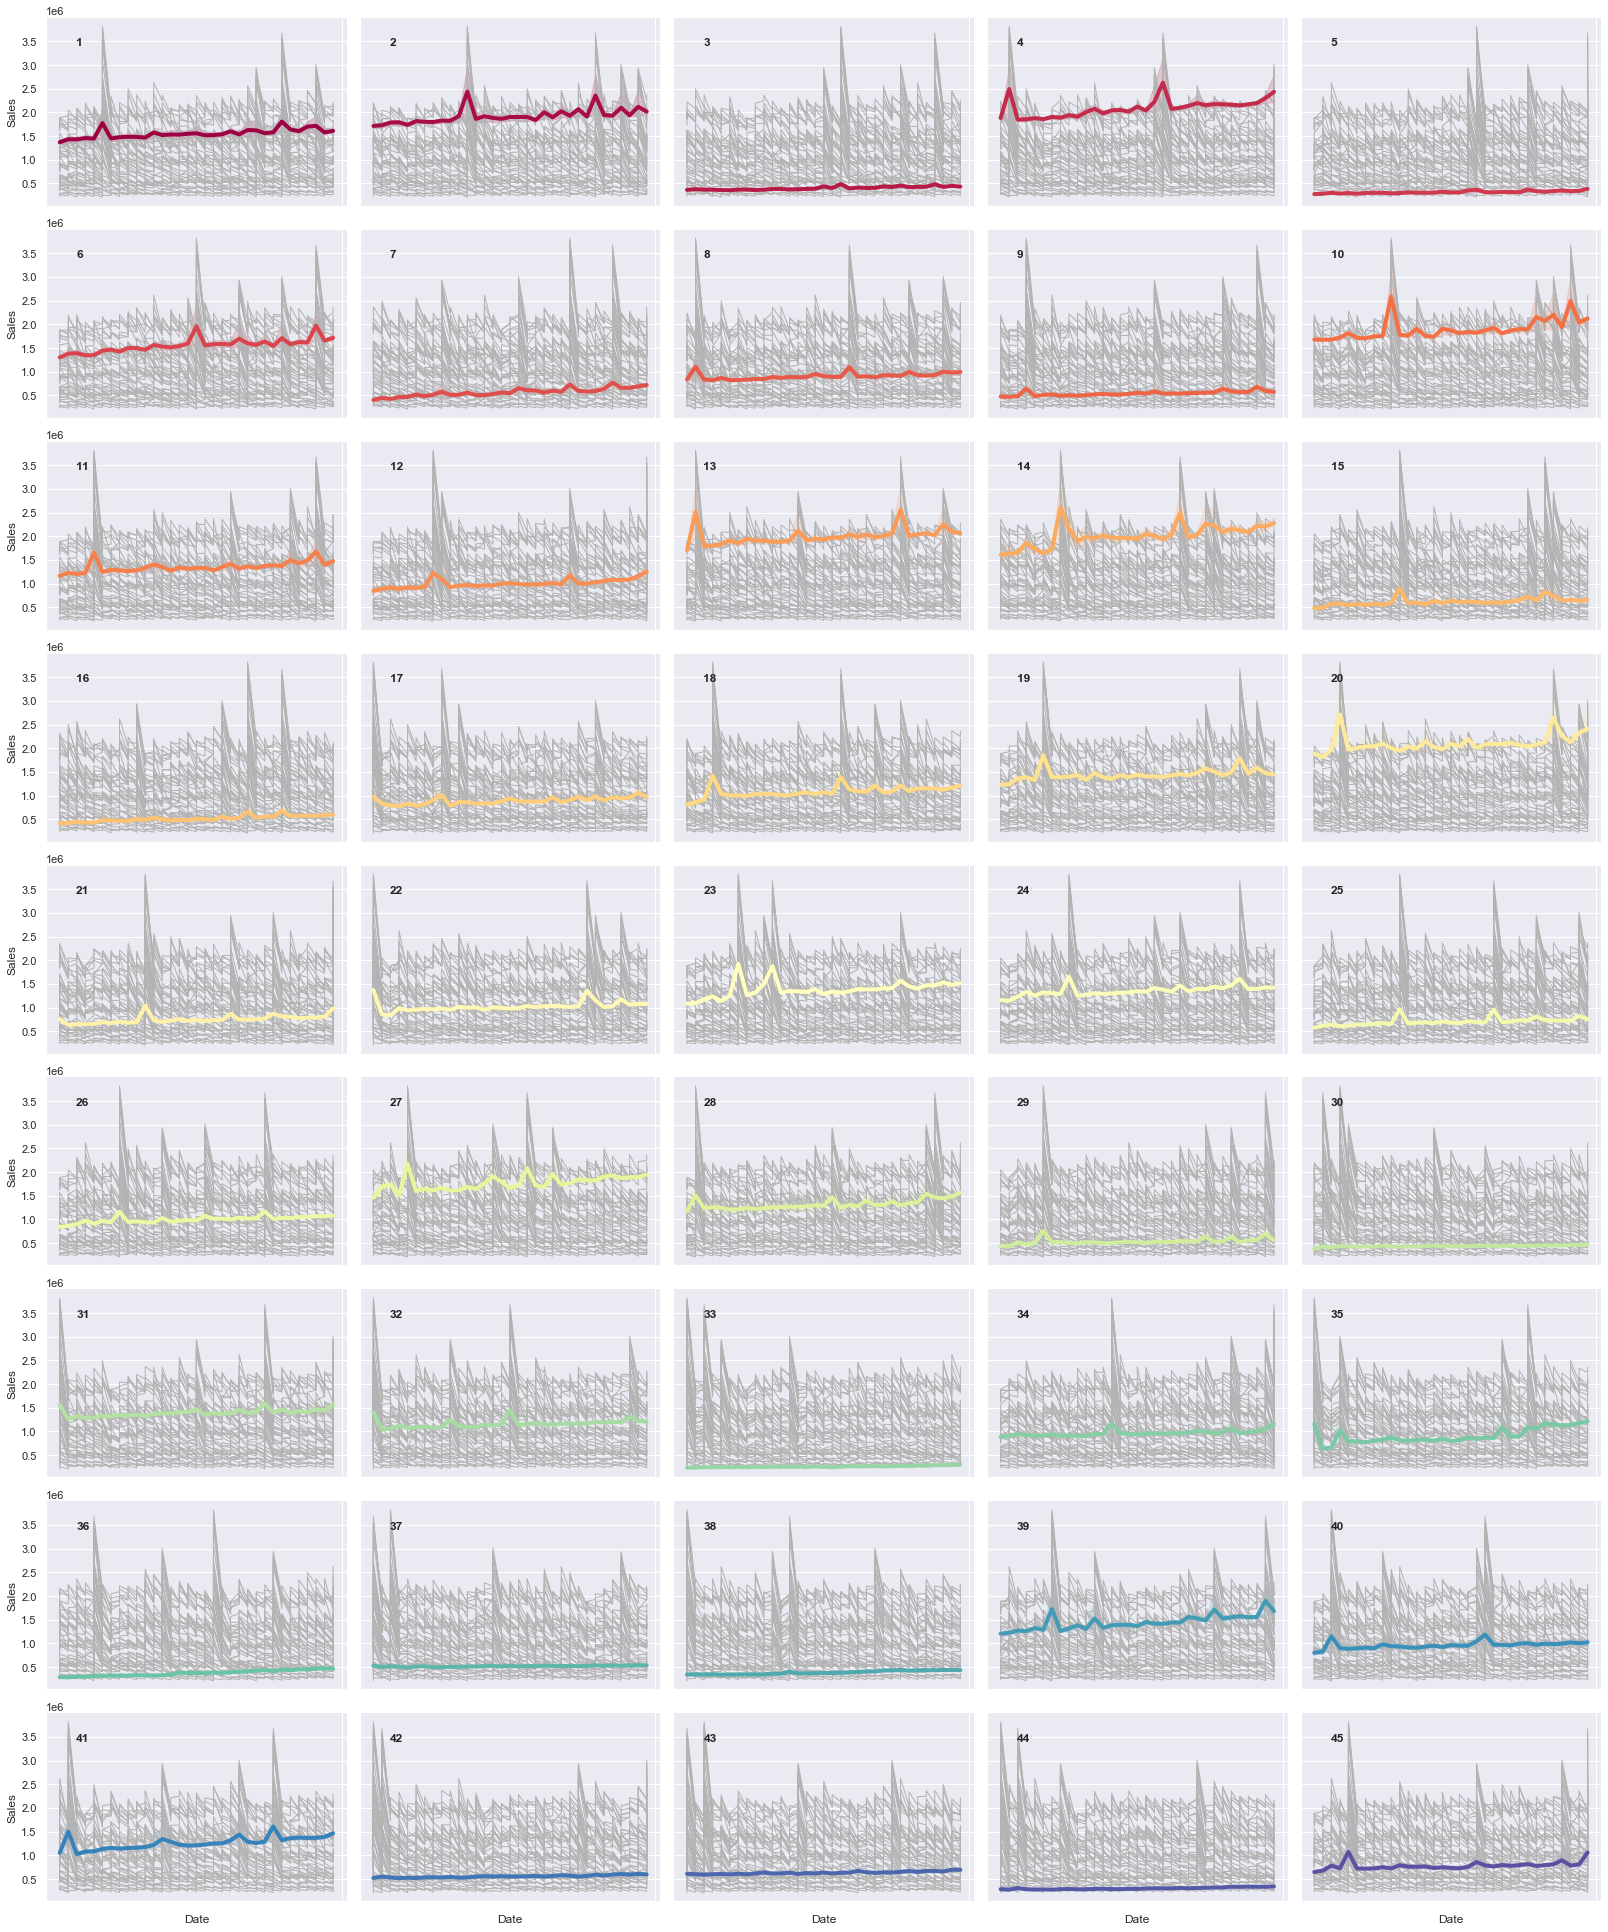

In [32]:
g = sns.relplot(data = Walmart_monthly, x = "YM", y = "Weekly_Sales",
                col = "Store", hue = "Store",
                kind = "line", palette = "Spectral",   
                linewidth = 4, zorder = 5,
                col_wrap = 5, height = 3, aspect = 1.5, legend = False
               )

#add text and silhouettes
for time, ax in g.axes_dict.items():
    ax.text(.1, .85, time,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = Walmart_monthly, x = "YM", y = "Weekly_Sales", units="Store",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )

ax.set_xticks('')
g.set_titles("")
g.set_axis_labels("Date", "Sales")
g.tight_layout()

## <font size = 1 > Plotting a correlation heatmap in order to understand the relationships between the variables better.

In [ ]:
print(Walmart_monthly.corr())


In [ ]:
dataplot = sb.heatmap(Walmart_monthly.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

## <font size = 1 > Plotting for the thanksgiving day sales.

In [ ]:
Thanksgiving = Walmart_monthly[(Walmart_monthly.Day == "25")&(Walmart_monthly.Month == "11")]
Thanksgiving

ax = sns.lineplot(data=Thanksgiving, x ='Store', y = 'Weekly_Sales')

In [ ]:
ts_dicomposition = seasonal_decompose(x=Thanksgiving[['Weekly_Sales']], model='additive', freq=4)
trend_estimate = ts_dicomposition.trend
seasonal_estimate = ts_dicomposition.seasonal
residual_estimate = ts_dicomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(20)

# First plot to the Original time series
axes[0].plot(Thanksgiving[['Weekly_Sales']], label='Original') 
axes[0].legend(loc='upper left');


# second plot to be for trend
axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');


# third plot to be Seasonality component
axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');


# last last plot to be Residual component
axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

## <font size = 1 > Getting the December data to see the sales before Christmas.

In [ ]:
Christmas = Walmart_monthly[(Walmart_monthly.Month == "12")]
Christmas.sort_values(by="Weekly_Sales", ascending=False)

#We can see the top sales are on 24th or 23rd so before Christmas.

In [ ]:
ax = sns.lineplot(data=Christmas, x ='Store', y = 'Weekly_Sales')

In [ ]:
ts_dicomposition = seasonal_decompose(x=Christmas[['Weekly_Sales']], model='additive', freq=4)
trend_estimate = ts_dicomposition.trend
seasonal_estimate = ts_dicomposition.seasonal
residual_estimate = ts_dicomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(20)

# First plot to the Original time series
axes[0].plot(Christmas[['Weekly_Sales']], label='Original') 
axes[0].legend(loc='upper left');


# second plot to be for trend
axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');


# third plot to be Seasonality component
axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');


# last last plot to be Residual component
axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

## Project estimation

### Univariate analysis for target variable

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss,adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import pmdarima as pm
import numpy as np
from datetime import timedelta 
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools
from patsy import dmatrices
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.metrics  import mean_squared_error

#### transform the data (if necessary), check stationarity (ADF, KPSS, comment)

In [36]:
X = Walmart['Weekly_Sales']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.624149
p-value: 0.000117
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


P-value is less than, let's say  𝛼=0.05 , therefore we reject the null hypothesis. Hence, the series is stationary.

In [37]:
result =kpss(X)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])

print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

KPSS Statistic: 1.845984
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




P-value is greater than, let's say  𝛼=0.05, therefore we cannot reject the null hypothesis and conclude that time series possess unit root. Therefore the series is not stationary.

#### identify the dependence orders of the model (ACF, PACF diagnostic, comment)

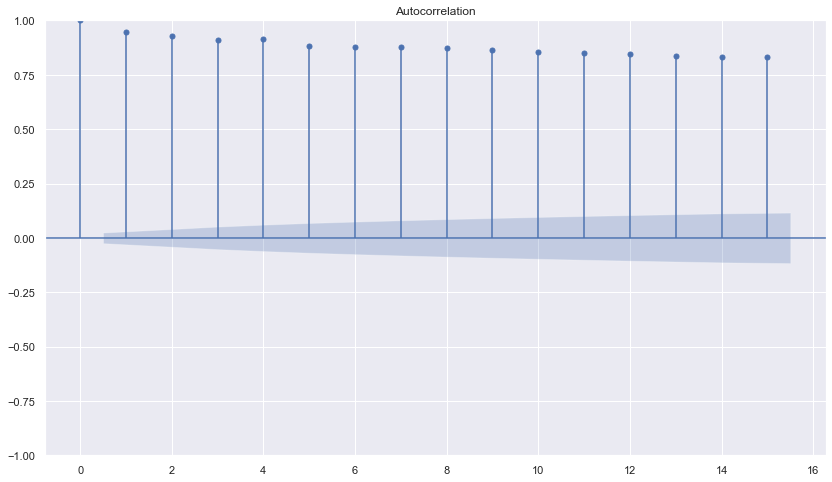

In [38]:
acf_plot = plot_acf(X,lags=15)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



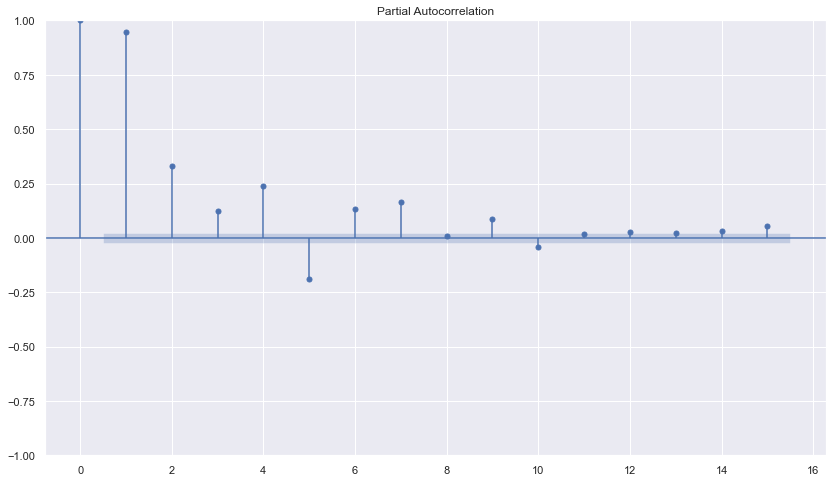

In [39]:
pacf_plot = plot_pacf(X,lags=15)

In both ACF and Pacf we have a lot of significant lags

Divide the data into train and test sets (take the ratio of your choice) estimate the model on train set

In [40]:
train_Walmart = X[:int(X.shape[0]*0.9)]

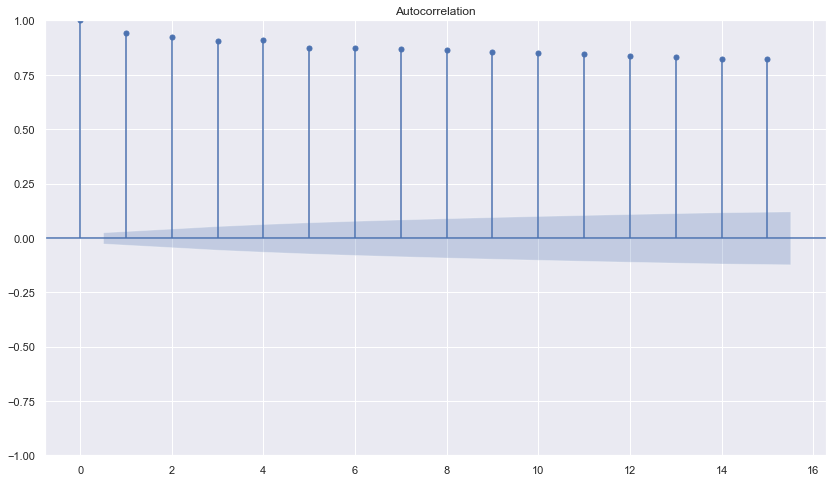

In [41]:
acf_plot = plot_acf(train_Walmart,lags=15)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



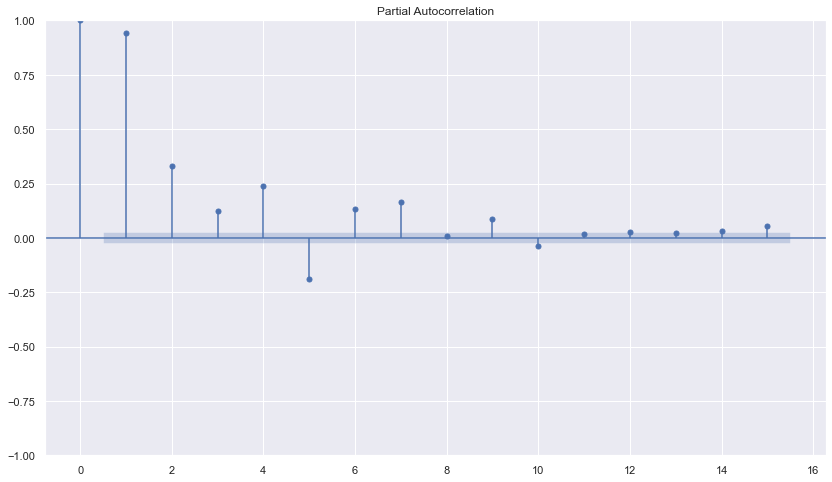

In [42]:
pacf_plot = plot_pacf(train_Walmart,lags=15)

#### perform residual diagnostics (including Ljung-Box test, comment)

In [49]:
mod2 = SARIMAX(train_Walmart, order=(1,0,1), seasonal_order=(1,1,2,7))
mod2_fit = mod2.fit()
print(mod2_fit.summary())

                                       SARIMAX Results                                        
Dep. Variable:                           Weekly_Sales   No. Observations:                 5791
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 7)   Log Likelihood              -78544.734
Date:                                Sat, 03 Dec 2022   AIC                         157101.468
Time:                                        22:22:01   BIC                         157141.445
Sample:                                             0   HQIC                        157115.376
                                               - 5791                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9838      0.004    254.320      0.000       0.976       0.991
ma.

In [43]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(Walmart['Weekly_Sales'], order=(3,0,0))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                 6435
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -86725.503
Date:                Sat, 03 Dec 2022   AIC                         173461.006
Time:                        22:19:55   BIC                         173494.854
Sample:                             0   HQIC                        173472.719
                               - 6435                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.047e+06   4.16e-11   2.52e+16      0.000    1.05e+06    1.05e+06
ar.L1          0.5898      0.004    136.660      0.000       0.581       0.598
ar.L2          0.2539      0.008     29.900      0.0

In [44]:
p=range(0,4)
q=range(0,4)
d=range(1,3)
pdq_combos =list(itertools.product(p,d,q))
rmse=[]  
order1=[]

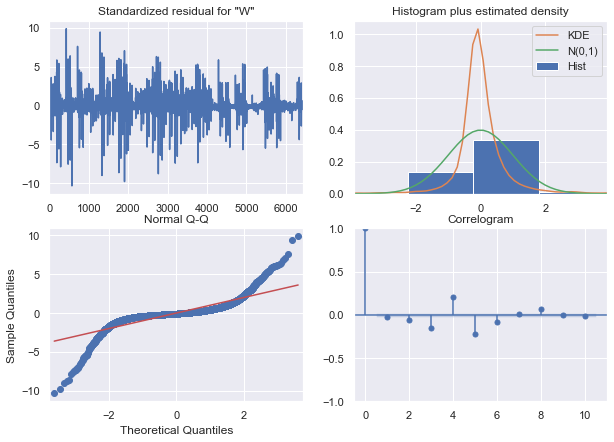

In [45]:
result.plot_diagnostics(figsize=(10,7))
plt.show()


$H_0$: The residuals are independently distributed.

$H_A$: The residuals are not independently distributed; they exhibit serial correlation.


# If the p-value is less than some threshold (e.g. α = .05), we reject the null hypothesis and conclude that the residuals are not independently distributed

In [50]:
residuals = mod2_fit.resid
jungbox = sm.stats.acorr_ljungbox(residuals, lags=10)
jungbox_df =pd.DataFrame(jungbox,columns=['lb_pvalue'])
jungbox_df.index = np.arange(1, len(jungbox_df)+1)
jungbox_df

lb_pvalue
1    3.030982e-03
2    8.286938e-03
3    1.146842e-14
4    1.884345e-52
5   2.084839e-110
6   5.129220e-120
7   4.682792e-119
8   3.099964e-121
9   1.597722e-120
10  7.142265e-120

As we can identify our p-values are small therefore we reject null hypothesis so the residuals are not independently distributed.

## Holt Winter’s

#### estimate the model on train set, explain why you choose additive or multiplicative model for trend and stationarity 

Text(0, 0.5, 'Count')

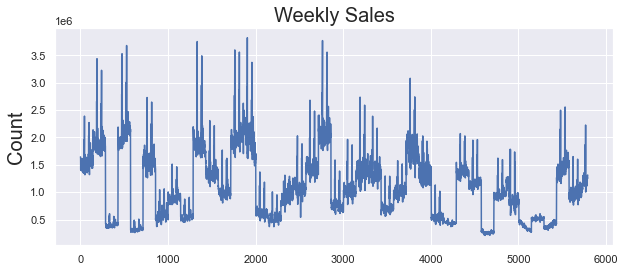

In [59]:
plt.figure(figsize=(10,4))
plt.plot(train_Walmart)
plt.title("Weekly Sales" ,fontsize=20)
plt.ylabel("Count",fontsize=20)


In [64]:
ts_dicomposition = seasonal_decompose(x=train_Walmart, model='additive', period=12)
trend_estimate = ts_dicomposition.trend
seasonal_estimate = ts_dicomposition.seasonal
residual_estimate = ts_dicomposition.resid

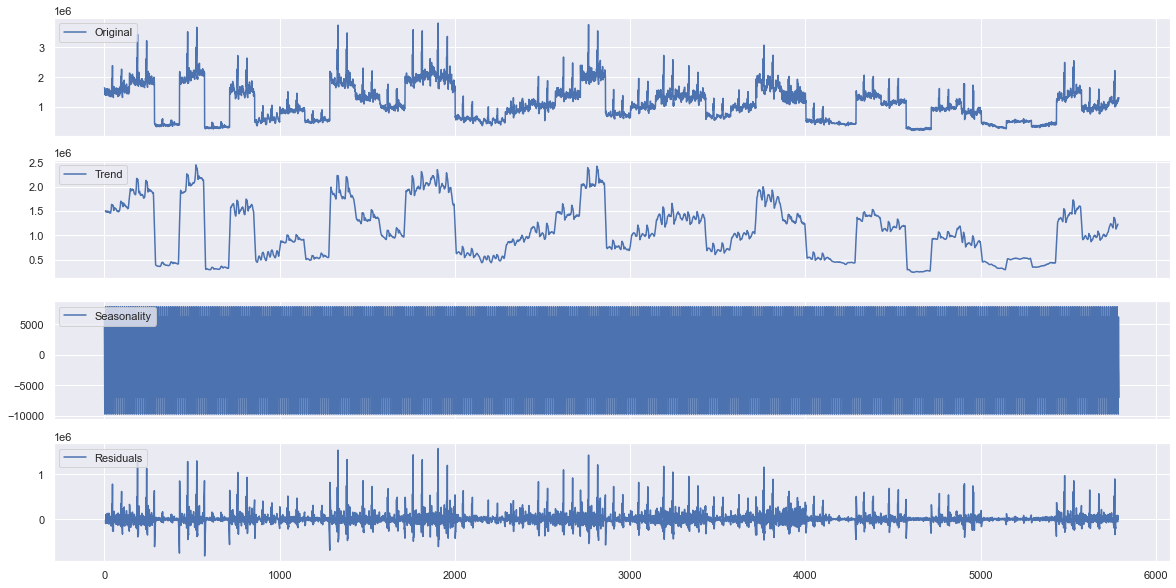

In [66]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(20)
# First plot to the Original time series
axes[0].plot(train_Walmart, label='Original') 
axes[0].legend(loc='upper left');
# second plot to be for trend
axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');
# third plot to be Seasonality component
axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');
# last last plot to be Residual component
axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

In [68]:
ts_dicomposition = seasonal_decompose(x=train_Walmart, model='multiplicative', period=12)
trend_estimate = ts_dicomposition.trend
seasonal_estimate = ts_dicomposition.seasonal
residual_estimate = ts_dicomposition.resid

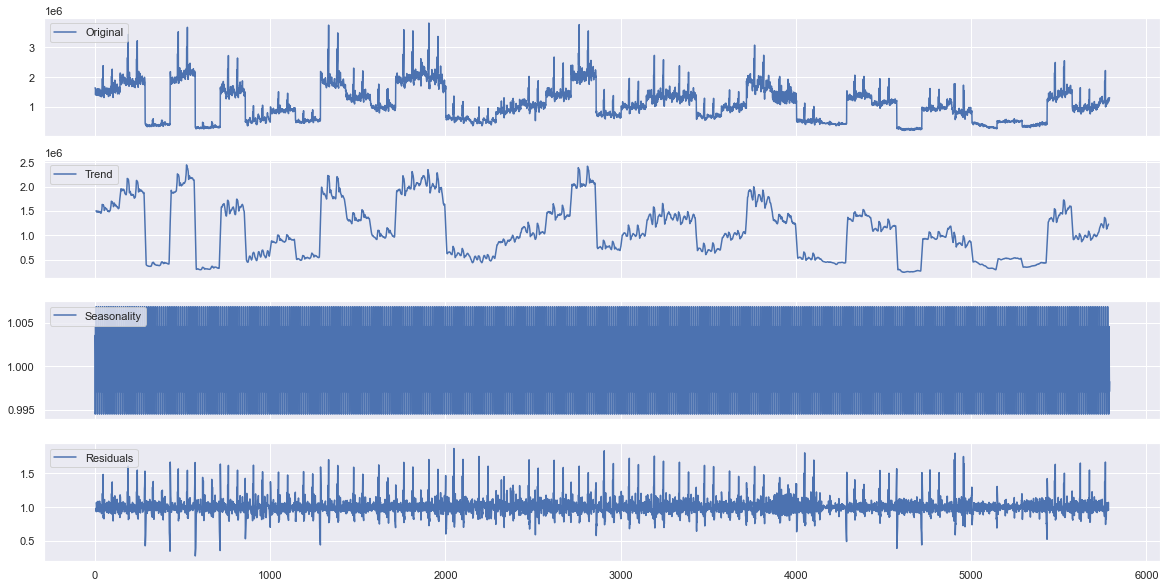

In [69]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(20)
# First plot to the Original time series
axes[0].plot(train_Walmart, label='Original') 
axes[0].legend(loc='upper left');
# second plot to be for trend
axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');
# third plot to be Seasonality component
axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');
# last last plot to be Residual component
axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

As we can see our data has trend and seasonality which can be seen from the graphs. The time series are additive as when we decompose it we can that the residuals are white noise (the mean is concentrated around 0) whereas when we plot for multiplicative we can see that it is not the case there and the mean is around 1.

####  do forecast for test set, calculate Mean Squared Error and compare with the best SARIMA model

In [75]:
Walmart["first_diff"]=Walmart['Weekly_Sales'].diff()
Walmart["first_diff"]

0             NaN
1        -1733.46
2       -29989.27
3      -202240.58
4       145079.09
          ...    
6430     -9912.25
6431     20281.12
6432      1009.29
6433    -16338.83
6434     42155.90
Name: first_diff, Length: 6435, dtype: float64

In [78]:
X_train = Walmart.iloc[:int(0.9*len(Walmart['Weekly_Sales']))]
X_test = Walmart.iloc[int(0.9*len(Walmart['Weekly_Sales'])):]
X_train

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
5786     41  13-05-2011    1270025.74             0        50.29       3.767   
5787     41  20-05-2011    1244542.33             0        41.11       3.828   
5788     41  27-05-2011    1278304.33             0        50.56       3.795   
5789     41  03-06-2011    1297584.95             0        54.81       3.763   
5790     41  10-06-2011    1311690.11             0        61.10       3.735   

             CPI  Unemployment       YM  Year Month Day  first_diff  
0     211.096358         8.106  02-2010  2010    02  05         NaN  
1     211.242170         8.106  02-2010  2010    02  12    -1733.46  
2     211.289143         8.106  02-2010  2010    02  19   -29989.27  
3     211.319643         8.106  02-2010  2010    02  26  -202240.58  
4     211.350143         8.106  03-2010  2010    03  05   145079.09  
...          ...           ...      ...   ...   ...  ..         ...  
5786  192.826069         6.934  05-2011  2011    05  13    25068.83  
5787  192.831317         6.934  05-2011  2011    05  20   -25483.41  
5788  192.836565         6.934  05-2011  2011    05  27    33762.00  
5789  192.841813         6.934  06-2011  2011    06  03    19280.62  
5790  192.847061         6.934  06-2011  2011    06  10    14105.16  

[5791 rows x 13 columns]

In [79]:
AR1=ARIMA(Walmart['Weekly_Sales'],order=(1,1,0))
ar_model=AR1.fit()
print(ar_model.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                 6435
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -86810.112
Date:                Sat, 03 Dec 2022   AIC                         173624.224
Time:                        22:42:40   BIC                         173637.763
Sample:                             0   HQIC                        173628.909
                               - 6435                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3464      0.004    -88.434      0.000      -0.354      -0.339
sigma2      3.064e+10   3.95e-14   7.76e+23      0.000    3.06e+10    3.06e+10
Ljung-Box (L1) (Q):                  16.94   Jarque-

In [81]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
and_seasonality_no_trend = ExponentialSmoothing(X_train["Weekly_Sales"],
                                                trend=None,seasonal='add',seasonal_periods=4).fit()
exp_smoothing_forecast = and_seasonality_no_trend.forecast(len(X_test))
SARIMA = SARIMAX(X_train["Weekly_Sales"], order=(0,1,1), seasonal_order=(2,0,6,4)).fit()
sarima_preds = SARIMA.forecast(len(X_test))

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [82]:
fc = ar_model.forecast(len(X_test), alpha=0.05)
fc_series = pd.Series(fc.values, index=X_test.index)

In [84]:
print('the error of the AR(1) is',mean_squared_error(X_test["Weekly_Sales"],fc_series))
print('the error of the Exponential Smoothing is',
      mean_squared_error(X_test["Weekly_Sales"],exp_smoothing_forecast))
print('the error of the SARIMA is',mean_squared_error(X_test["Weekly_Sales"],sarima_preds))

the error of the AR(1) is 102418443778.6022
the error of the Exponential Smoothing is 491071548866.8271
the error of the SARIMA is 463509463096.31055


In [85]:
ar_model.forecast(len(X_test), alpha=0.05)

6435    745676.927755
6436    750736.515756
6437    748983.670619
6438    749590.926798
6439    749380.548791
            ...      
7074    749434.679240
7075    749434.679240
7076    749434.679240
7077    749434.679240
7078    749434.679240
Name: predicted_mean, Length: 644, dtype: float64

Based on MSE we can infer that exponential smoothing does the best forecast.

In [86]:
fc = ar_model.forecast(len(X_test), alpha=0.05)
fc_series = pd.Series(fc.values, index=X_test.index)
fc_series

5791    745676.927755
5792    750736.515756
5793    748983.670619
5794    749590.926798
5795    749380.548791
            ...      
6430    749434.679240
6431    749434.679240
6432    749434.679240
6433    749434.679240
6434    749434.679240
Length: 644, dtype: float64

In [87]:
X_test.index

RangeIndex(start=5791, stop=6435, step=1)

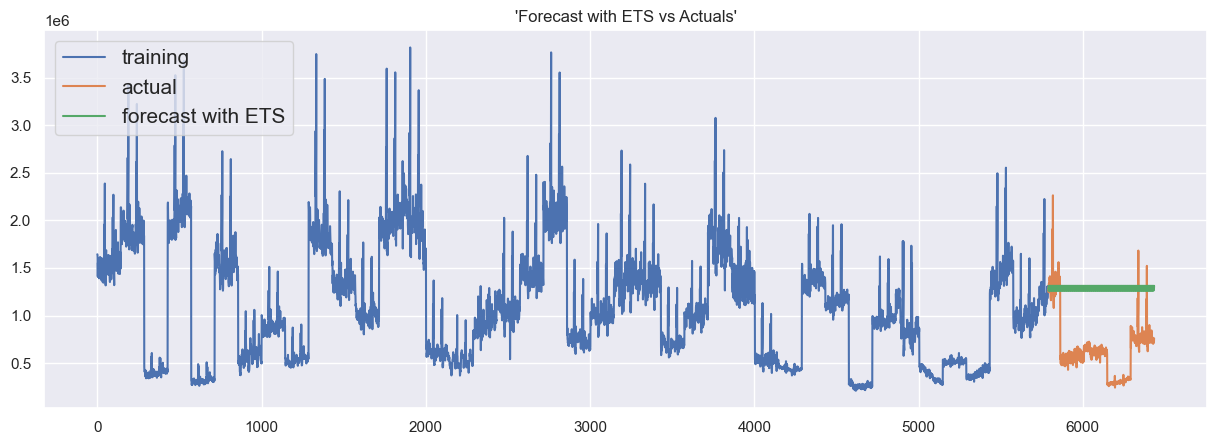

In [89]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(X_train.index, X_train["Weekly_Sales"], label='training')
plt.plot(X_test.index, X_test["Weekly_Sales"], label='actual')
plt.plot(exp_smoothing_forecast.index, exp_smoothing_forecast, label='forecast with ETS')
plt.title("'Forecast with ETS vs Actuals'")
plt.legend(loc='upper left', fontsize=15)
plt.show()

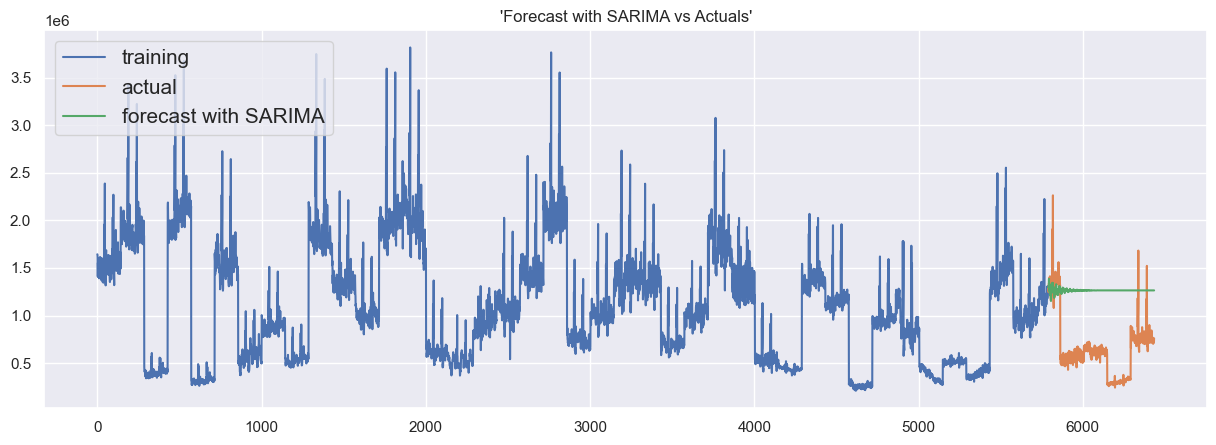

In [90]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(X_train.index, X_train["Weekly_Sales"], label='training')
plt.plot(X_test.index, X_test["Weekly_Sales"], label='actual')
plt.plot(sarima_preds.index, sarima_preds, label='forecast with SARIMA')
plt.title("'Forecast with SARIMA vs Actuals'")
plt.legend(loc='upper left', fontsize=15)
plt.show()

#### Estimate model for original data (100%), forecast with best model (for the same periods used in previous model), add forecasts to the plot with SARIMA forecasts


In [91]:
AR1 = ARIMA(Walmart['Weekly_Sales'],order=(1,1,0)).fit()
AR1_pred = AR1.forecast(8)
and_seasonality_no_trend = ExponentialSmoothing(Walmart['Weekly_Sales'],trend=None,seasonal='add',seasonal_periods=4).fit()
exp_smoothing_forecast = and_seasonality_no_trend.forecast(8)
SARIMA = SARIMAX(Walmart['Weekly_Sales'], order=(1,1,1),seasonal_order=(3,0,1,4)).fit()
sarima_preds = SARIMA.forecast(8)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



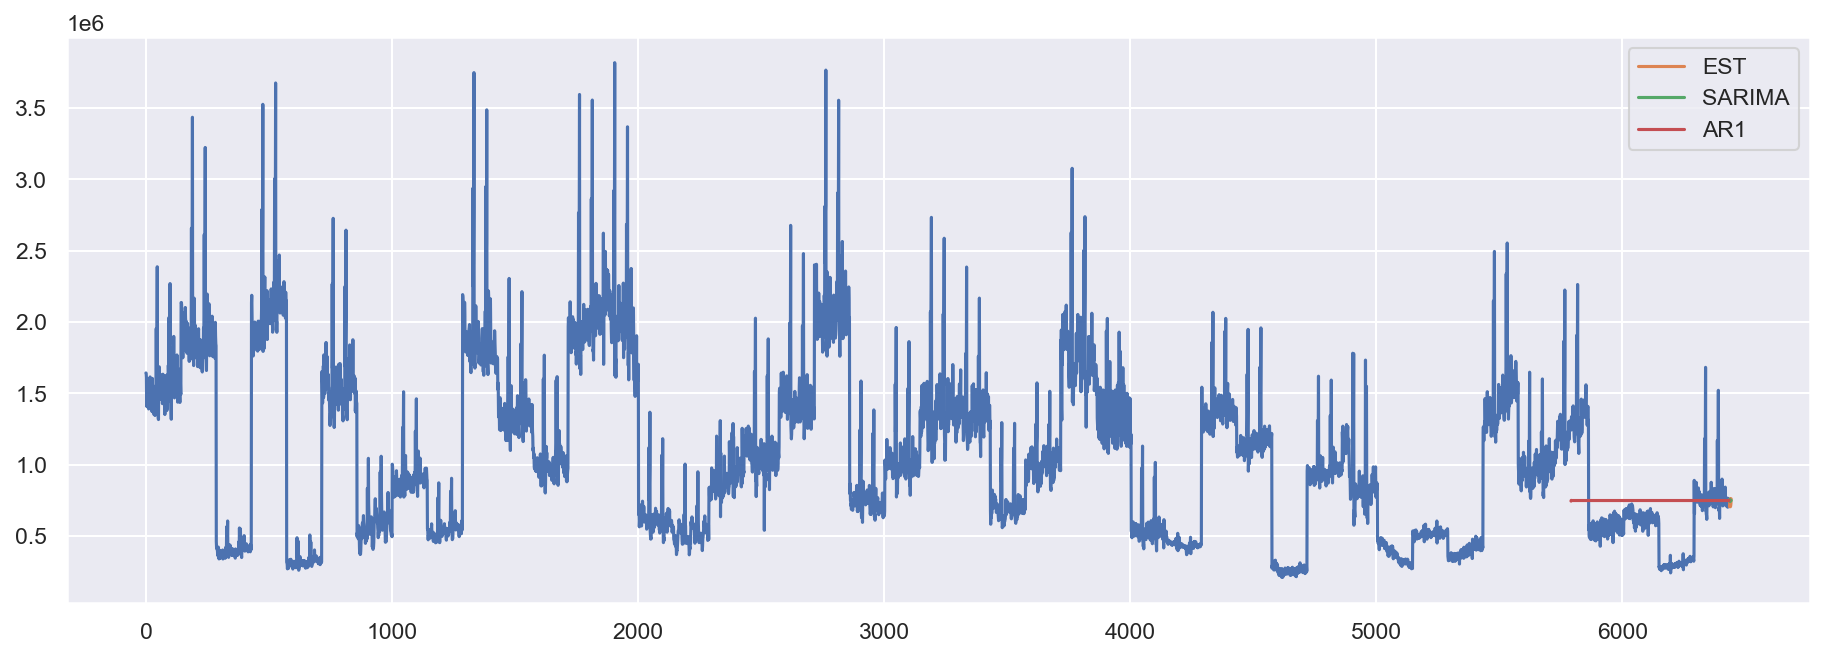

In [94]:
plt.figure(figsize=(15,5),dpi=150)
plt.plot(Walmart['Weekly_Sales'])
plt.plot(exp_smoothing_forecast , label='EST')
plt.plot(sarima_preds,label="SARIMA")
plt.plot(fc_series,label="AR1")
plt.legend()

We can identify fluctuating seasonality that happens mostly because of holidays. 

## Project estimation II

### At this stage we are going to estimate a VAR model

### a. was already done above

In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(Walmart["Temperature"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.251852
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


### b. Select an appropriate VAR(p) model by using information criteria.

In [8]:
from statsmodels.tsa.api import VAR
model=VAR(pd.concat([Walmart["Weekly_Sales"], Walmart["Temperature"]],axis = 1))
information_criteria=model.select_order(maxlags=15)
information_criteria.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

##### lag 15 has the smallest AIC.

### c. Fit the selected model and interpret all coefficients.

In [9]:
model=VAR(pd.concat([Walmart["Weekly_Sales"], Walmart["Temperature"]],axis = 1))
results = model.fit(1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 13, Dec, 2022
Time:                     17:59:22
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    27.9174
Nobs:                     6434.00    HQIC:                   27.9133
Log likelihood:          -108043.    FPE:                1.32323e+12
AIC:                      27.9111    Det(Omega_mle):     1.32199e+12
--------------------------------------------------------------------
Results for equation Weekly_Sales
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const               60179.604325      9220.772667            6.527           0.000
L1.Weekly_Sales         0.945013         0.004080          231.601           0.000
L1.Temperature        -45.254726       124.84

##### For the Weekly Sales equation the constant coefficient  and L1.Weekly_Sales are significant for p=0.05. 

##### For the Holiday_Flag equation the constant coefficient and L1.Temperature are significant for p=0.05. 

### d. Examine the residuals.

In [19]:
sales = Walmart['Weekly_Sales']
temp = Walmart['Temperature']

In [15]:
results.resid['Weekly_Sales']
results.resid['Temperature']
results.resid

Weekly_Sales  Temperature
1      30382.767517    -4.756946
2       1859.672350     0.236761
3    -171976.386312     5.594303
4     164525.952435    -0.883742
5     -87846.693283    10.561770
...             ...          ...
6430  -27375.706654    -0.240008
6431    2252.709554     0.181565
6432  -15903.476457   -10.243194
6433  -33667.653193     1.557606
6434   24019.168253     2.052755

[6434 rows x 2 columns]

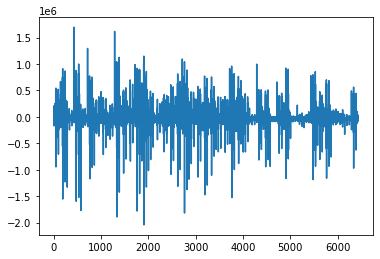

In [16]:
plt.plot(results.resid['Weekly_Sales'])

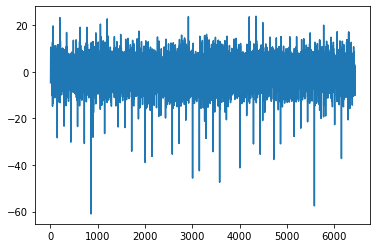

In [17]:
plt.plot(results.resid['Temperature'])

In [21]:
sm.stats.acorr_ljungbox(results.resid['Weekly_Sales'], lags=10, return_df=True)

lb_stat      lb_pvalue
1    634.530514  5.169894e-140
2    640.240906  9.407054e-140
3    759.589074  2.512628e-164
4   1430.773393  1.467752e-308
5   1767.890095   0.000000e+00
6   1768.244917   0.000000e+00
7   1780.907748   0.000000e+00
8   1817.643210   0.000000e+00
9   1817.656568   0.000000e+00
10  1817.662210   0.000000e+00

In [22]:
sm.stats.acorr_ljungbox(results.resid['Temperature'], lags=10, return_df=True)

lb_stat      lb_pvalue
1   173.393264   1.343030e-39
2   180.502645   6.373070e-40
3   243.970813   1.317618e-52
4   528.215307  5.283550e-113
5   531.025242  1.600577e-112
6   536.954709  9.157710e-113
7   618.161574  2.985653e-129
8   654.277346  4.960354e-136
9   678.921385  2.348016e-140
10  786.088864  2.018173e-162

#### All the p-values are less than 0.05, so the residuals are correlated and we can conclude that they are not independent.

### e. Perform an impulse response analysis (i.e. plot the IRF and comment). Are the results sensible for you?

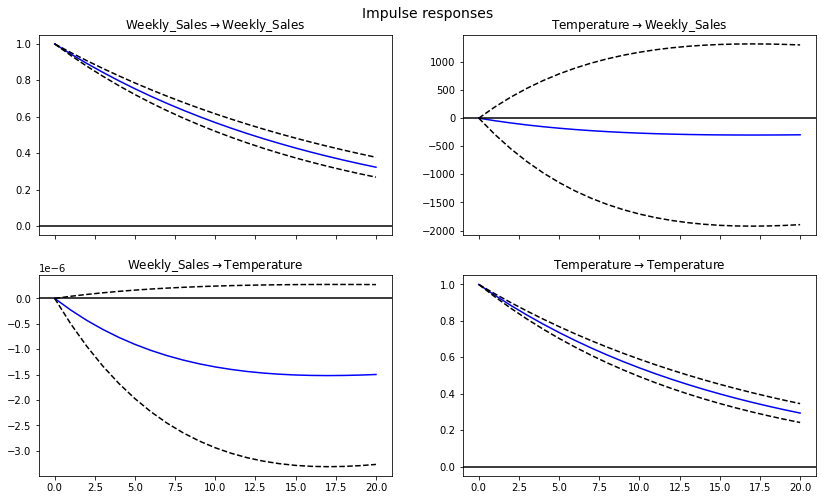

In [26]:
irf = results.irf(20)  # impulse response
irf.plot(orth=False,figsize = [12,7]);

### f. Produce  6 months ahead forecast. 

In [24]:
results.forecast(y = pd.concat([Walmart["Weekly_Sales"], Walmart["Temperature"]],axis = 1).values[-1:,:],steps = 24)
#steps=104 because the data is weekly one year has about 52 weeks

array([[7.75992443e+05, 5.90261039e+01],
       [7.90831589e+05, 5.91881395e+01],
       [8.04847447e+05, 5.93371428e+01],
       [8.18085877e+05, 5.94740771e+01],
       [8.30590173e+05, 5.95998380e+01],
       [8.42401207e+05, 5.97152580e+01],
       [8.53557569e+05, 5.98211106e+01],
       [8.64095689e+05, 5.99181145e+01],
       [8.74049963e+05, 6.00069375e+01],
       [8.83452865e+05, 6.00881996e+01],
       [8.92335055e+05, 6.01624766e+01],
       [9.00725481e+05, 6.02303031e+01],
       [9.08651477e+05, 6.02921752e+01],
       [9.16138848e+05, 6.03485532e+01],
       [9.23211962e+05, 6.03998643e+01],
       [9.29893827e+05, 6.04465046e+01],
       [9.36206167e+05, 6.04888413e+01],
       [9.42169498e+05, 6.05272151e+01],
       [9.47803187e+05, 6.05619413e+01],
       [9.53125528e+05, 6.05933125e+01],
       [9.58153791e+05, 6.06215993e+01],
       [9.62904286e+05, 6.06470526e+01],
       [9.67392415e+05, 6.06699043e+01],
       [9.71632723e+05, 6.06903693e+01]])